In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

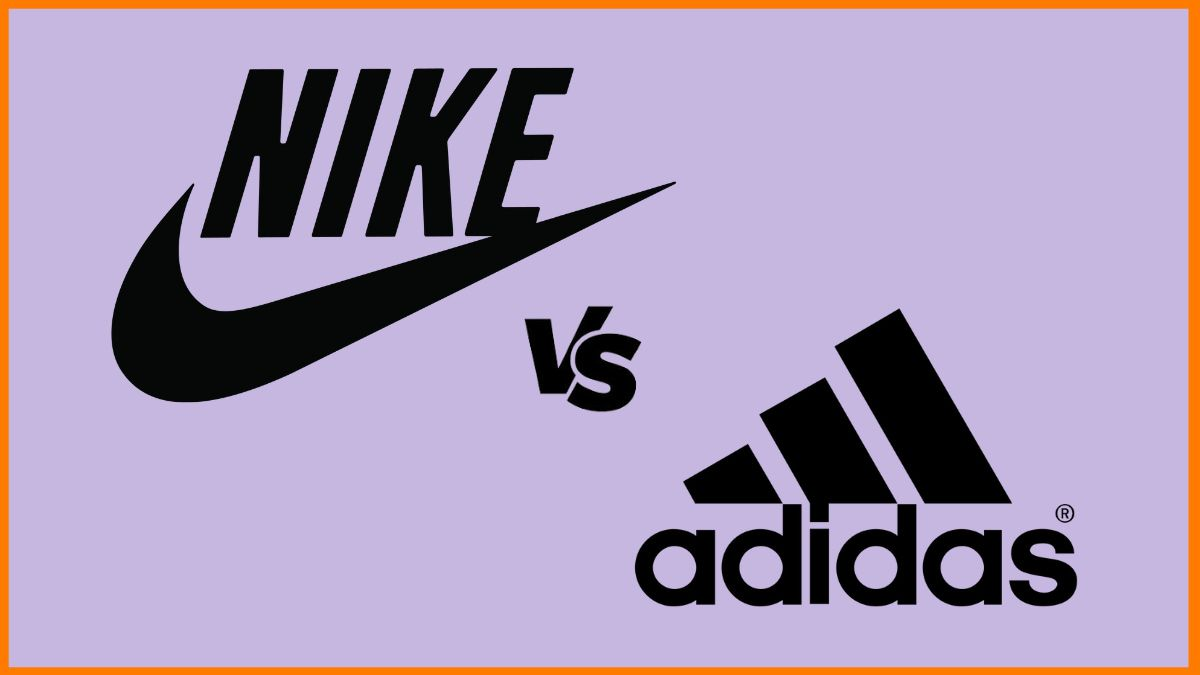

                                    Table of Contents
                                    
                                    
                                  
*                                     [Introduction](#Introduction).
*                             [Data Cleaning and Pre Processing.](#Cleaning).
*                                 [EDA of Nike and adidas](#A)
*                                  [Conclusion](#B)
                               


<a id="Introduction"></a>
**Introduction**

**Nike** and **Adidas** are the oldest rivals, in the footwear Industry. Both these Brands represent excellence in performance with their Products.
The Mojo of Nike is  "**Just do it**" while Adidas Mojo is "**Nothing is impossible**".
Both these Brands have delivered Iconic Products over the years.
Some of Nike's Legendary products are **Jordans**, **Air Max**, A**irforce 1**, the list goes on. While Adidas too have iconic products like **Superstars**,
**Ultraboost**, NMD   and the recent Hit  **The Yeezy's**.
With the help  of the Data set provided. I could dive deep into the Analysis as to how these products differ in terms of the discounts, Selling price, Listing Price etc.


<a id ="Cleaning"></a>
**Data Cleaning and Pre Processing**

Cleaning the data wasn't a big deal as the data had very few anomalies. There were no null values present, Every column standard values.

In [68]:
NikeAdidas= pd.read_csv('/Users/harshjaiswal/Desktop/Git/Adidas vs Nike /Adidas Vs Nike.csv')

**The data set**

In [69]:
NikeAdidas

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [70]:
NikeAdidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [71]:
NikeAdidas.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [72]:
NikeAdidas.isnull().count()

Product Name     3268
Product ID       3268
Listing Price    3268
Sale Price       3268
Discount         3268
Brand            3268
Description      3268
Rating           3268
Reviews          3268
Last Visited     3268
dtype: int64

**Dropping the Product ID column**



The product ID column provided no need for the Analysis.

In [73]:
NikeAdidas=NikeAdidas.drop(columns=['Product ID'], axis=1)

**Converting String to Date and time format**

Rectifying,  the date and time column, as the data provided in the dataset was in string format.

In [74]:
NikeAdidas['Last Visited']=pd.to_datetime(NikeAdidas['Last Visited'])

In [75]:
NikeAdidas

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01
3264,Nike Phantom Venom Club IC,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07
3266,Nike Air Max 98,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19


In [76]:
NikeAdidas.isnull().count()

Product Name     3268
Listing Price    3268
Sale Price       3268
Discount         3268
Brand            3268
Description      3268
Rating           3268
Reviews          3268
Last Visited     3268
dtype: int64

In [77]:
NikeAdidas

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01
3264,Nike Phantom Venom Club IC,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07
3266,Nike Air Max 98,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19


**Listing Price**


There were some places where the Listing price was set to Zero and technically that is not correct so Replacing them with the sale Price and if you notice closely the places where the sale value is zero the discount is also zero.


In [78]:
boolean_condition=NikeAdidas['Listing Price']==0
Column_Name='Listing Price'
new_value= NikeAdidas['Sale Price']
NikeAdidas.loc[boolean_condition,Column_Name]=new_value
NikeAdidas

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01
3264,Nike Phantom Venom Club IC,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07
3266,Nike Air Max 98,16995,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19


In [79]:
NikeAdidas.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

**Correcting the Sub Brands.**




The Subbrand Adidas originals were repeated twice, so replacing Adidas Adidas Originals with Adidas Originals.

In [80]:
NikeAdidas['Brand']= NikeAdidas['Brand'].replace('Adidas Adidas ORIGINALS','Adidas ORIGINALS')
NikeAdidas.Brand.unique()


array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

**Grouping By Data frame by Nike and Adidas**

In [81]:
GroupedByBrands=NikeAdidas.groupby('Brand')
Nike= GroupedByBrands.get_group('Nike')
Orginals=GroupedByBrands.get_group('Adidas ORIGINALS')
Neo=GroupedByBrands.get_group('Adidas CORE / NEO')
Sports=GroupedByBrands.get_group('Adidas SPORT PERFORMANCE')
Frames=[Orginals,Neo,Sports]
Adidas=pd.concat(Frames)
Adidas.reset_index(inplace=True,drop=True)



<a id= "A"></a>
# EDA of Nike and adidas

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


**Discounts offered**



From the pie chart, it is clear that Nike usually offers any discount.
Meanwhile, every sub-brand of Adidas has offered discounts.

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_30042/488893816.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AvgDis=GroupedByBrands.mean()


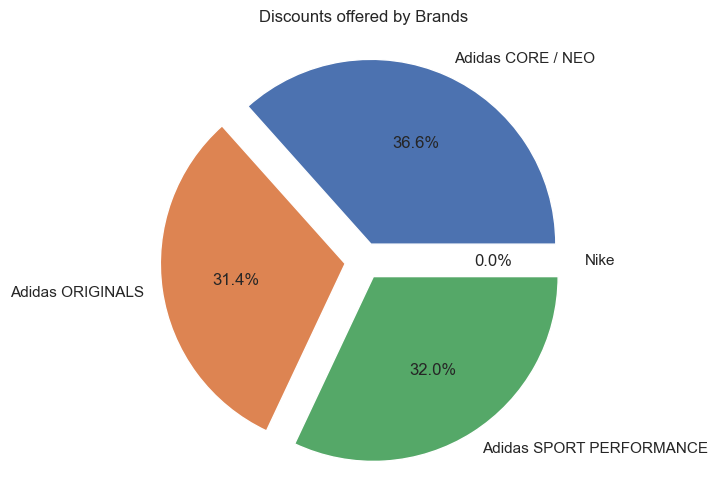

In [83]:
GroupedByBrands=NikeAdidas.groupby(NikeAdidas['Brand'])
AvgDis=GroupedByBrands.mean()
plt.subplots(figsize=(10,6));
discount=np.array(AvgDis.Discount)
label=AvgDis.index
plt.pie(x=discount,autopct="%.1f%%", explode=[0.10]*4,labels=label);
plt.title('Discounts offered by Brands');



**Products offered by Adidas and Nike**


Products offered by Adidas is way more than that of Adidas. The difference is clearly Visible

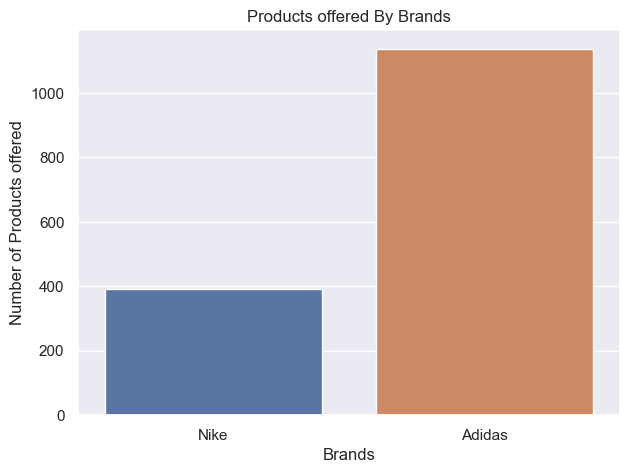

In [84]:
n=Nike['Product Name'].value_counts().count()
a=Adidas['Product Name'].value_counts().count()
Products=[n,a]
Brands=['Nike','Adidas'];
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x=Brands,y=Products).set(xlabel='Brands', ylabel='Number of Products offered');
plt.title('Products offered By Brands');






**Adidas**

In [85]:
Adidas

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
3,Men's adidas Originals Forest Grove Shoes,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13 15:06:15
4,Women's adidas Originals Swift Run Shoes,7599,4559,40,Adidas ORIGINALS,The Swift distills decades of adidas heritage ...,2.7,36,2020-04-13 15:06:16
...,...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,10999,10999,0,Adidas SPORT PERFORMANCE,It's just you and the batsman. As you steam to...,4.9,47,2020-04-13 15:07:59
2621,Men's adidas Cricket Howzat Shoes,6999,6999,0,Adidas SPORT PERFORMANCE,"Batting, fielding or bowling, these Howzat Spi...",4.4,30,2020-04-13 15:07:59
2622,Men's Cricket Cri Hase Shoes,3999,3999,0,Adidas SPORT PERFORMANCE,Thiese shoes are a great choice for the amatue...,2.0,87,2020-04-13 15:07:59
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,7999,7999,0,Adidas SPORT PERFORMANCE,These shoes fit easily into a travel bag so yo...,4.6,6,2020-04-13 15:07:59


**Common Products offered by Adidas**

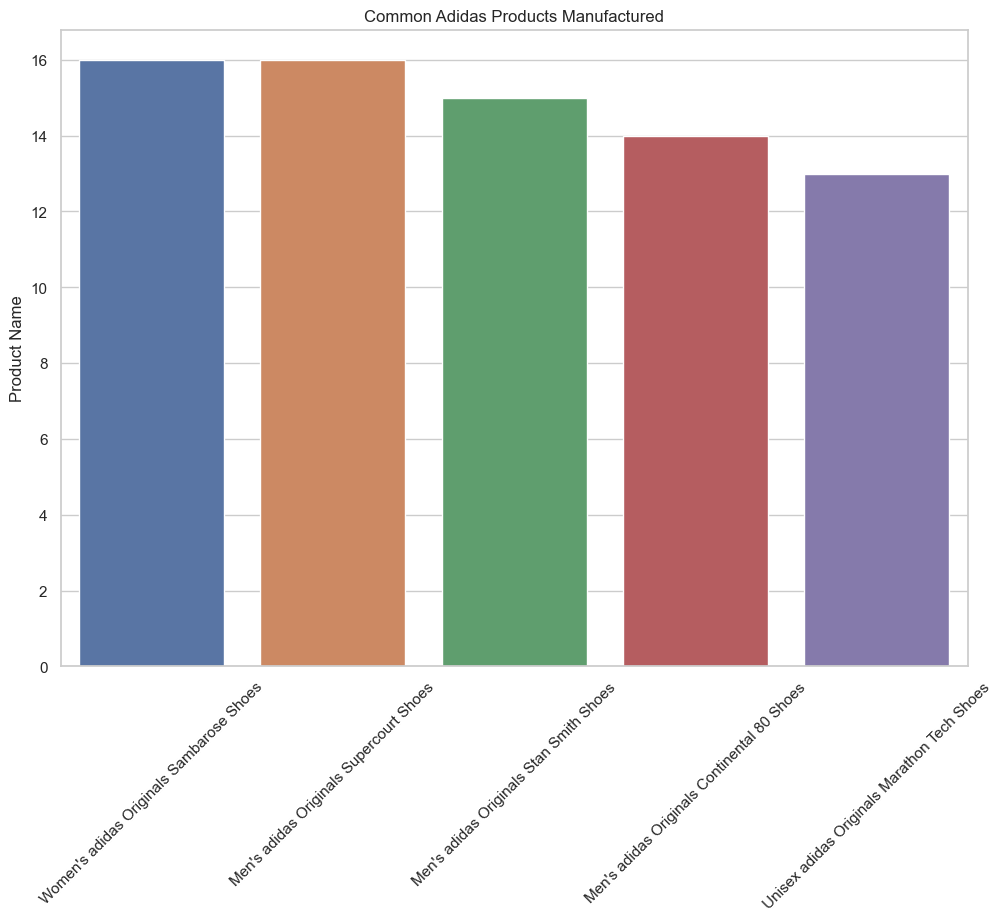

In [86]:
AdidasProducts=Adidas['Product Name'].value_counts().head()
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(x=AdidasProducts.index,y=AdidasProducts).tick_params(axis='x', rotation=45);
plt.title('Common Adidas Products Manufactured');

**Common Products offered by Nike**

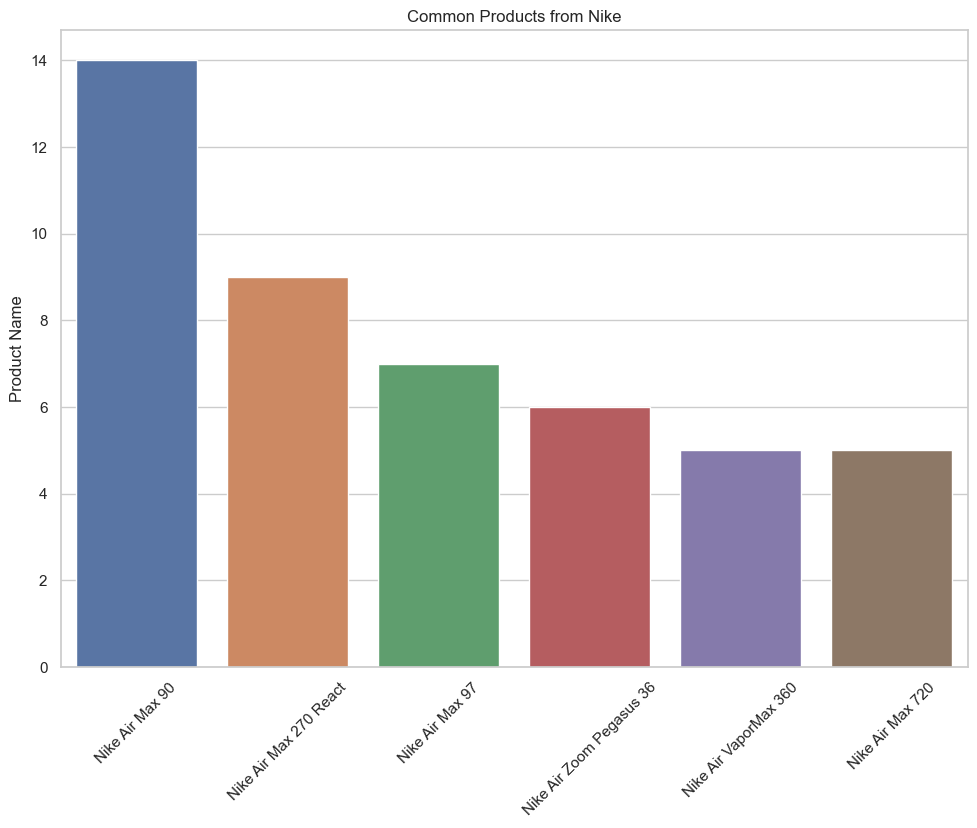

In [87]:
NikeProducts=Nike['Product Name'].value_counts().head(6)
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(x=NikeProducts.index, y=NikeProducts).tick_params(axis='x', rotation=45);
plt.title('Common Products from Nike');


**Average Listing Price for Nike**


The average Listing Price of Nike is between RS(7500 to 10000)

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_30042/683263665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Nike['Listing Price'],bins=10,color='r');


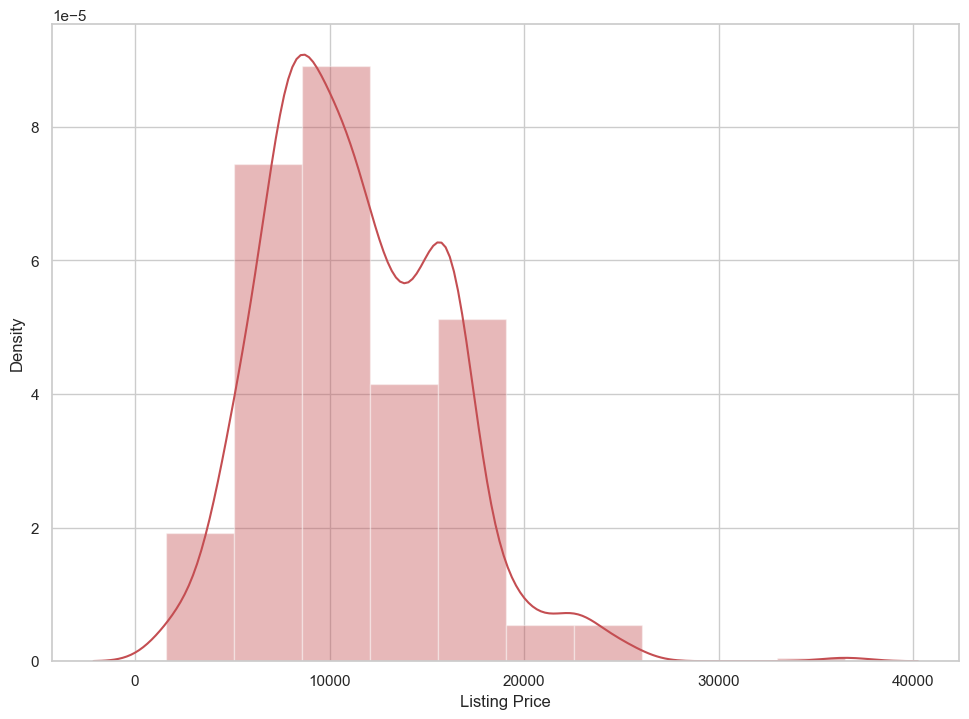

In [88]:

sns.set_style('whitegrid')
sns.distplot(Nike['Listing Price'],bins=10,color='r');


**Average Listing Price for Adidas**

The Average Listing Price of Adidas Lies between RS(5000 to 7500), Making Adidas way more cheaper than Nike

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_30042/2413600934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Adidas['Listing Price'],bins=10,color='black');


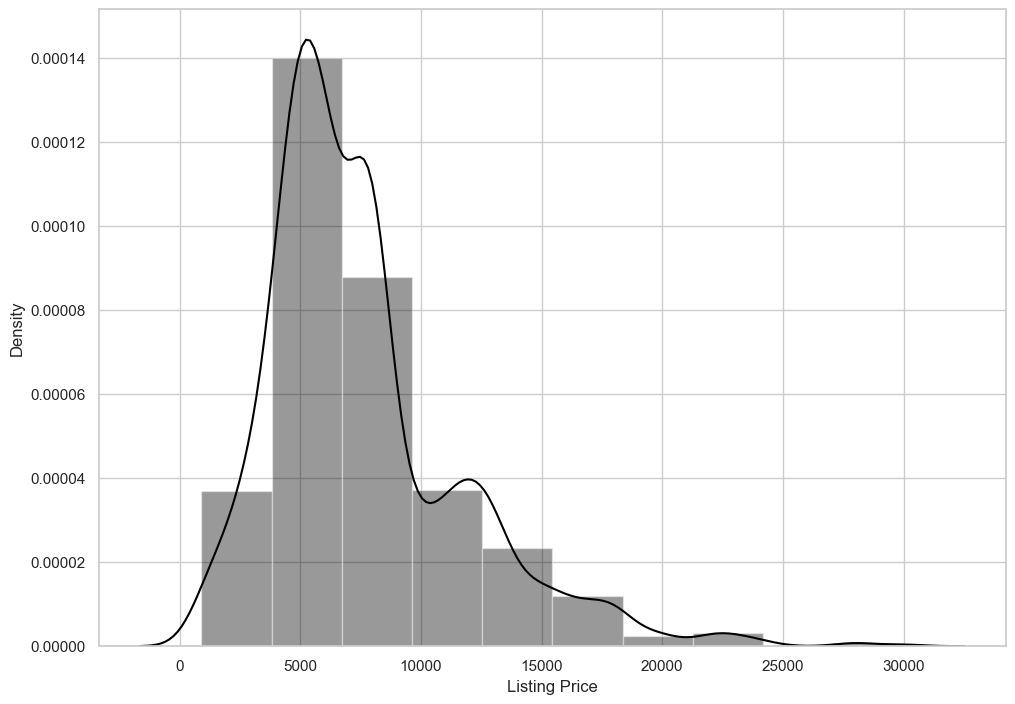

In [89]:
sns.set_theme(style='whitegrid')
sns.distplot(Adidas['Listing Price'],bins=10,color='black');

**Rating and Reviews by Nike**

The average rating received by Nike is low, this implies poor customer satisfaction. However the standard deviation revies for the same band is quite significant, suggesting the popularity of its products.

In [90]:
Nike[['Rating','Reviews']].describe()


,Rating,Reviews
count,643.000000,643.000000
mean,2.734837,7.181960
std,2.137756,15.968315
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.800000,1.000000
75%,4.600000,6.000000
max,5.000000,223.000000


**Rating and Reviews by Adidas**

The average rating received by Adidas is fairly higher than Nike. Apart from customer satisfaction, this could be due to the fact that Adidas products are fairly cheap and offer huge discounts on their products.
The Standard Deviation for reviews is again good when compared to Nike, the possible reason for this can be that Adidas offers a wide range of products while Nike products are very limited.

In [91]:
Adidas[['Rating','Reviews']].describe()

,Rating,Reviews
count,2625.000000,2625.000000
mean,3.366362,48.725714
std,1.159873,28.926042
min,0.000000,0.000000
25%,2.700000,24.000000
50%,3.500000,49.000000
75%,4.300000,74.000000
max,5.000000,99.000000


**Higest Rated Nike Products**

In [92]:
Highest_Rated_product=Nike.Rating.max()
Nike_Highest_Rated= Nike[Nike.Rating==Highest_Rated_product]
for product in Nike_Highest_Rated['Product Name']:
    print(product)


Nike Free Metcon 3
Nike Air Max 270 React ENG
Nike Air Max 90
Air Jordan XXXIV PF
LeBron 7 QS
Nike Air Force 1 '07 LV8
Jordan 'Why Not?' Zer0.3 PF
Nike Metcon 5 AMP
Nike Air Max 97
Nike Renew Fusion
Nike Air Max 90 Premium
Nike Epic Phantom React A.I.R. Cody Hudson
Nike Air Max 90
Nike Air Max 270 React ENG
Nike Free Metcon 3
Nike ISPA Joyride Envelope
Nike Mercurial Superfly 7 Academy MG
Nike Daybreak SP
Kyrie 5 x Bandulu
Nike Air Max Impact
Nike Air Max 90 QS
Nike Air Force 1 '07 LV8
Nike Air Max 90
Nike x Carhartt WIP Air Max 95
Nike Air Zoom Winflo 6
Nike Air Max 97
Nike Air Force 1 '07 LV8
Nike Air Max Verona
Nike Air Max Plus III
Nike Metcon 5 AMP
Nike React Kenny 55
Nike Phantom Vision Club Dynamic Fit FG
Nike Mercurial Superfly 7 Academy IC
Nike Zoom Rival Fly
Jordan Aerospace 720
Nike Air Max Plus III
Nike Air Max 90
Nike Air Zoom Terra Kiger 6
Nike Air Max 97 Utility
Jordan Jumpman 2020 PF
Air Jordan XXXIV PF
Nike React Sertu
Nike React Element 55 SE
Nike SB Zoom Stefan Janos

In [93]:
Highest_Rated_product_Adidas=Adidas.Rating.max()
Highest_Rated_A = Adidas[Adidas.Rating==Highest_Rated_product]
for product in Highest_Rated_A['Product Name']:
    print(product)



Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES
Women's adidas Originals Forest Grove Shoes
Women's adidas Originals SL Andridge Shoes
Women's adidas Originals Falcon Shoes
Women's adidas Originals Deerupt Runner Shoes
WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES
WOMEN'S ADIDAS ORIGINALS FLB_RUNNER SHOES
Women's ADIDAS ORIGINALS COURTVANTAGE VULCANIZED SHOES
Women's adidas Originals U_Path Run Shoes
Unisex adidas Originals Continental Vulc Shoes
WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES
Women's adidas Originals Supercourt RX Shoes
Men's adidas Originals Superstar MG Shoes
Men's adidas Originals Rivalry Low Shoes
Men's adidas Originals Liberty Cup Shoes
Men's adidas Originals Supercourt Shoes
MEN'S ADIDAS ORIGINALS GAZELLE SHOES
Men's adidas Originals A.R. Trainer Shoes
Men's adidas Originals Lxcon Shoes
Men's adidas Originals Stan Smith Gore-Tex Shoes
Men's adidas Originals Liberty Cup Shoes
Women's adidas Running Duramo 9 Shoes
Women's adidas Sport Inspired Cloudfoam Pure Shoes
Women's adi

<a id='B'></a>
# Conclusion


According to the Data set Nike is compared to Three subrands of Adidas, that gives an unfair advantage.
Howerever speaking in terms of Numbers Adidas seems to be more better reviewed brand then Nikes.
Another Possible conclusing that can be drawned from this is Adidas is more economical when compared to Nike, thus the sale could be more resulting in more number of reviews.
However Nike sheer Brand strength is enough to show a high standard deviation.